In [31]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv(r'C:\Users\shaik\Downloads\Harvestify-master-1\Harvestify-master\Data-processed\crop_recommendation.csv')

In [33]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,66,56,38,20.879744,82.002744,6.502985,202.935536,rice
1,72,39,36,21.770462,80.319644,7.038096,226.655537,rice
2,69,46,41,23.004459,82.320763,7.840207,263.964248,rice
3,67,53,35,26.491096,80.158363,6.980401,242.864034,rice
4,83,42,40,20.130175,81.604873,7.628473,262.717340,rice


In [34]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,83,24,29,26.774637,66.413269,6.780064,177.774507,coffee
2196,89,18,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,81,28,35,24.131797,67.225123,6.362608,173.322839,coffee
2198,113,40,27,26.272418,52.127394,6.758793,127.175293,coffee
2199,106,29,26,23.603016,60.396475,6.779833,140.937041,coffee


In [35]:
df.size

17600

In [36]:
df.shape

(2200, 8)

In [37]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [38]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [39]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [40]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])


### Seperating features and target label

In [42]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [43]:
acc = []
model = []

In [44]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  84.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       0.95      0.95      0.95        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      0.91      0.95        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.00      0.00      0.00        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.87      0.95      0.91        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [48]:
score

array([0.93636364, 0.90909091, 0.91590909, 0.91590909, 0.93181818])

### Saving trained Decision Tree model

In [49]:
import pickle
DT_pkl_filename = r'C:\Users\shaik\Downloads\Harvestify-master-1\Harvestify-master\modelsDecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

# Guassian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [51]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99772727, 0.99545455, 0.99318182, 0.98863636])

### Saving trained Guassian Naive Bayes model

In [52]:
import pickle
NB_pkl_filename = r'C:\Users\shaik\Downloads\Harvestify-master-1\Harvestify-master\models\NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)

X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9818181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.93      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [54]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97272727, 0.98181818, 0.98181818, 0.98181818, 0.97045455])

In [55]:
import pickle

SVM_pkl_filename = r'C:\Users\shaik\Downloads\Harvestify-master-1\Harvestify-master\models\SVMClassifier.pkl'
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
SVM_Model_pkl.close()

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9477272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.81      0.90        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.94      0.80      0.86        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      0.82      0.82        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       0.83      0.95      0.89        21
       mango       1.00      0.92      0.96        26
   mothbeans       0.85      0.89      0.87        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [57]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95681818, 0.95227273, 0.93409091, 0.96590909, 0.95227273])

### Saving trained Logistic Regression model

In [58]:
import pickle
from sklearn.linear_model import LogisticRegression

LR_pkl_filename = r'C:\Users\shaik\Downloads\Harvestify-master-1\Harvestify-master\models\LogisticRegression.pkl'

with open(LR_pkl_filename, 'wb') as LR_Model_pkl:
    pickle.dump(LogReg, LR_Model_pkl)
LR_Model_pkl.close()


## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

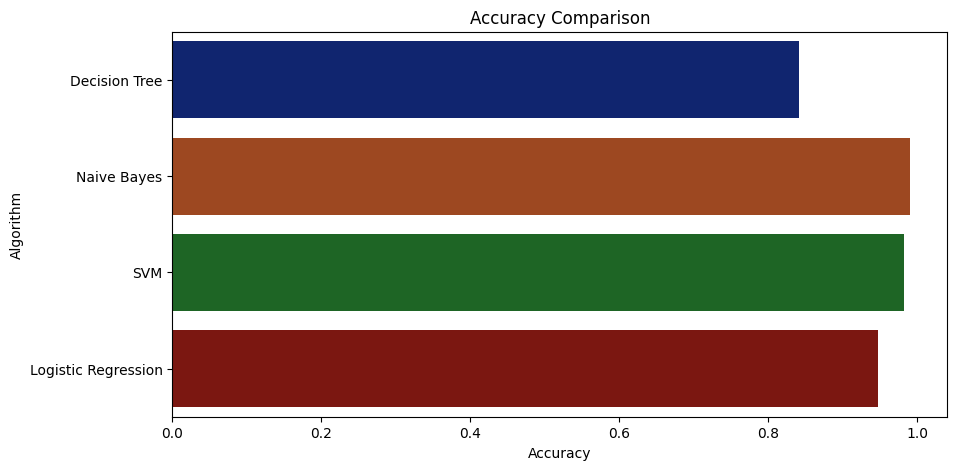

In [59]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [66]:
from tabulate import tabulate

accuracy_models = dict(zip(model, acc))

data = [(k, v) for k, v in accuracy_models.items()]

table = tabulate(data, headers=["Model", "Accuracy"], tablefmt="grid")

print(table)


+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| Decision Tree       |   0.840909 |
+---------------------+------------+
| Naive Bayes         |   0.990909 |
+---------------------+------------+
| SVM                 |   0.981818 |
+---------------------+------------+
| Logistic Regression |   0.947727 |
+---------------------+------------+


## Making a prediction

In [61]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = NaiveBayes.predict(data)
print(prediction)

['coffee']


In [62]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = NaiveBayes.predict(data)
print(prediction)

['jute']
